In [1]:
# Import useful libraries

# for computation

import numpy as np
import pandas as pd

# for visualization

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Boston

In [2]:
# reading the dataset
# get the data from here : http://insideairbnb.com/get-the-data.html

boston_calendar_sep2016 = pd.read_csv('Boston_calendar_sep2016.csv')
boston_calendar_oct2017 = pd.read_csv('Boston_calendar_oct2017.csv')
boston_calendar_apr2018 = pd.read_csv('Boston_calendar_apr2018.csv')
boston_calendar_jan2019 = pd.read_csv('Boston_calendar_jan2019.csv')
boston_calendar_jan2020 = pd.read_csv('Boston_calendar_jan2020.csv')



A peak at the data

In [3]:
boston_calendar_oct2017.head()

,listing_id,date,available,price
0,20872145,2018-09-22,f,NaN
1,20872145,2018-09-21,f,NaN
2,20872145,2018-09-20,f,NaN
3,20872145,2018-09-19,f,NaN
4,20872145,2018-09-18,f,NaN


## Data Cleaning

We have to remove the '$' sign of the **price** column and convert srting into float

In [4]:
# function to remove $ sign and return float

def str_to_float(string):
    """
    INPUT
    string - string of the price (ex : $250.00)
    
    OUTPUT
    float - returns float value of the price (ex: 250.0)
    """
    if string[:1] == '$':
        return float(string[1:].replace(',', ''))
    else:
        return np.nan

We can extract the month and year from the **date** column 

In [5]:
# Sep 2016
boston_calendar_sep2016["price"] = boston_calendar_sep2016["price"].dropna().apply(str_to_float)
boston_calendar_sep2016["year"] = pd.DatetimeIndex(boston_calendar_sep2016['date']).year
boston_calendar_sep2016["month"] = pd.DatetimeIndex(boston_calendar_sep2016['date']).month


# Oct 2017
boston_calendar_oct2017["price"] = boston_calendar_oct2017["price"].dropna().apply(str_to_float)
boston_calendar_oct2017["year"] = pd.DatetimeIndex(boston_calendar_oct2017['date']).year
boston_calendar_oct2017["month"] = pd.DatetimeIndex(boston_calendar_oct2017['date']).month

# Apr2018
boston_calendar_apr2018["price"] = boston_calendar_apr2018["price"].dropna().apply(str_to_float)
boston_calendar_apr2018["year"] = pd.DatetimeIndex(boston_calendar_apr2018['date']).year
boston_calendar_apr2018["month"] = pd.DatetimeIndex(boston_calendar_apr2018['date']).month

# Jan 2019
boston_calendar_jan2019["price"] = boston_calendar_jan2019["price"].dropna().apply(str_to_float)
boston_calendar_jan2019["year"] = pd.DatetimeIndex(boston_calendar_jan2019['date']).year
boston_calendar_jan2019["month"] = pd.DatetimeIndex(boston_calendar_jan2019['date']).month

# Jan 2020
boston_calendar_jan2020["price"] = boston_calendar_jan2020["price"].dropna().apply(str_to_float)
boston_calendar_jan2020["year"] = pd.DatetimeIndex(boston_calendar_jan2020['date']).year
boston_calendar_jan2020["month"] = pd.DatetimeIndex(boston_calendar_jan2020['date']).month

Our plan is to see how much the yearly average pricing has changed from the year 2017-2020 and investigate any general trend.

Let's extract the yearly data from the above dataset. We only need **year** ,**month**, **available** and **price** columns

In [6]:
# Year 2017
boston_2017_p1 = boston_calendar_sep2016[boston_calendar_sep2016["year"] == 2017]
boston_2017_p2 = boston_calendar_oct2017[boston_calendar_oct2017["year"] == 2017]

boston_2017 = pd.concat([boston_2017_p1,boston_2017_p2], axis = 0)
boston_2017 = boston_2017[["year" ,"month", "available" ,"price"]]

# Year 2018
boston_2018_p1 = boston_calendar_oct2017[boston_calendar_oct2017["year"] == 2018]
boston_2018_p2 = boston_calendar_apr2018[boston_calendar_apr2018["year"] == 2018]

boston_2018 = pd.concat([boston_2018_p1,boston_2018_p2], axis = 0)
boston_2018 = boston_2018[["year" ,"month", "available" ,"price"]]

# Year 2019
boston_2019_p1 = boston_calendar_apr2018[boston_calendar_apr2018["year"] == 2019]
boston_2019_p2 = boston_calendar_jan2019[boston_calendar_jan2019["year"] == 2019]

boston_2019 = pd.concat([boston_2019_p1,boston_2019_p2], axis = 0)
boston_2019 = boston_2019[["year" ,"month", "available" ,"price"]]

# Year 2020
boston_2020_p1 = boston_calendar_jan2019[boston_calendar_jan2019["year"] == 2020]
boston_2020_p2 = boston_calendar_jan2020[boston_calendar_jan2020["year"] == 2020]

boston_2020 = pd.concat([boston_2020_p1,boston_2020_p2], axis = 0)
boston_2020 = boston_2020[["year" ,"month", "available" ,"price"]]
# Year 2021
# boston_2018_p1 = boston_calendar_oct2017[boston_calendar_oct2017["year"] == 2021]
# boston_2018_p2 = boston_calendar_apr2018[boston_calendar_apr2018["year"] == 2021]

boston_2021 = boston_calendar_jan2020[boston_calendar_jan2020["year"] == 2021]
boston_2021 = boston_2021[["year" ,"month", "available" ,"price"]]


Let's expand the **available** column using one-hot encoding

In [7]:
# 2017
boston_one_hot_2017 = pd.get_dummies(boston_2017['available'])
boston_2017 = boston_2017.join(boston_one_hot_2017)

# 2018
boston_one_hot_2018 = pd.get_dummies(boston_2018['available'])
boston_2018 = boston_2018.join(boston_one_hot_2018)

#2019
boston_one_hot_2019 = pd.get_dummies(boston_2019['available'])
boston_2019 = boston_2019.join(boston_one_hot_2019)

#2020
boston_one_hot_2020 = pd.get_dummies(boston_2020['available'])
boston_2020 = boston_2020.join(boston_one_hot_2020)

#2021
boston_one_hot_2021 = pd.get_dummies(boston_2021['available'])
boston_2021 = boston_2021.join(boston_one_hot_2021)

### Merge the data

In [8]:
boston_total = pd.concat([boston_2017,boston_2018,boston_2019,boston_2020], axis = 0)

In [9]:
# Free up some memory


boston_calendar_sep2016 = []
boston_calendar_oct2017 = []
boston_calendar_apr2018 = []
boston_calendar_jan2019 = []
boston_calendar_jan2020 = []

boston_one_hot_2017 = []
boston_one_hot_2018 = []
boston_one_hot_2019 = []
boston_one_hot_2020 = []
boston_2017 = []
boston_2018 = []
boston_2019 = []
boston_2020 = []

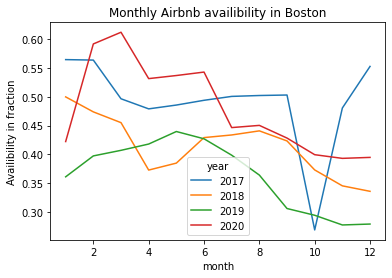

In [102]:
boston_total.groupby(["month","year"]).t.mean().unstack().plot(kind='line',title = "Monthly Airbnb availibility in Boston");
plt.ylabel("Availibility in fraction");

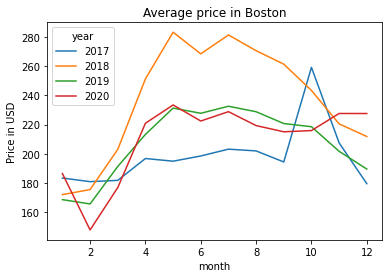

In [104]:
boston_total.groupby(["month","year"]).price.mean().unstack().plot(kind='line',title = "Average price in Boston");
plt.ylabel("Price in USD");


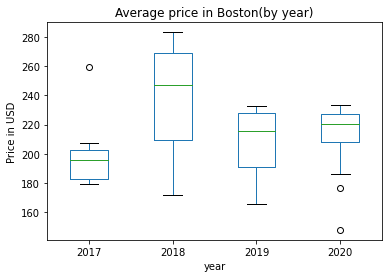

In [120]:
ax = boston_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Average price in Boston(by year)");
plt.ylabel("Price in USD");
ax.set_xlabel("year");
plt.savefig('boston_price_year.png')

Text(0, 0.5, 'change in price by month (in USD)')

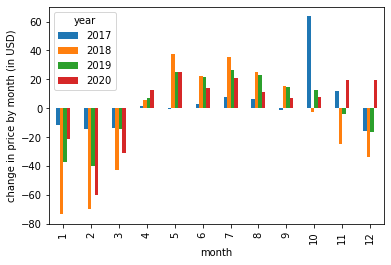

In [146]:
(boston_total.groupby(["month","year"]).price.mean().unstack() - boston_total.groupby(["year"]).price.mean()).plot(kind='bar');
plt.ylabel("change in price by month (in USD)")

Average of price in each month from 2017-2020

Text(0, 0.5, 'Price change in USD')

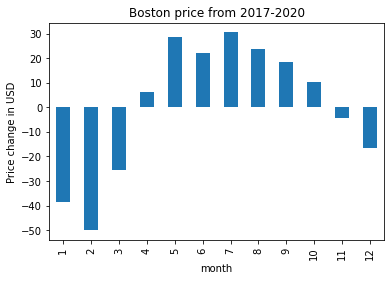

In [147]:
(boston_total.groupby(["month"]).price.mean() - boston_total.price.mean()).plot(kind='bar', title = "Boston price from 2017-2020")
plt.ylabel("Price change in USD")

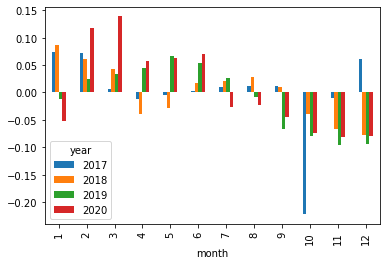

In [106]:
(boston_total.groupby(["month","year"]).t.mean().unstack() - boston_total.groupby(["year"]).t.mean()).plot(kind='bar');
plt.ylabel("Change in Availibility from yearly average");

In [108]:
boston_total.groupby(["year"]).t.mean() # availibility by year

year
2017    0.490794
2018    0.412495
2019    0.372804
2020    0.473337
Name: t, dtype: float64

Heatmap showing the variation of price by year and month. We see that for Boston the average price is higher during summer and fall and the price drops during winter. Although during 2020 due to the availibility of Airbnb housing is lower than  normal and the monthly rate is higher that the yearly average.

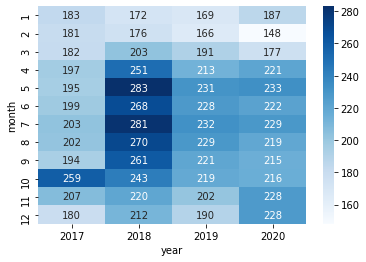

In [83]:
sns.heatmap(boston_total.groupby(["month","year"]).price.mean().unstack(),fmt = '.0f',annot = True,cmap='Blues');

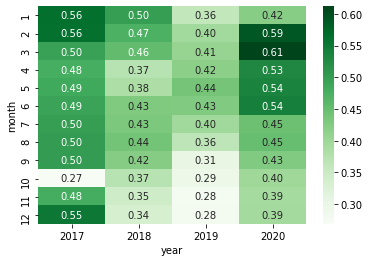

In [79]:
sns.heatmap(boston_total.groupby(["month","year"]).t.mean().unstack(),fmt = '.02f',annot = True,cmap='Greens');

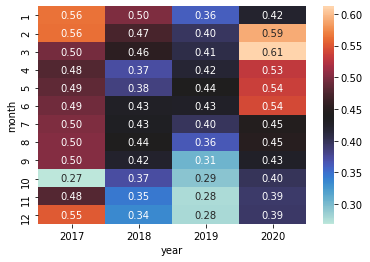

In [30]:
sns.heatmap(boston_total.groupby(["month","year"]).t.mean().unstack(),fmt = '.02f',annot = True,cmap='icefire');

# Seattle

In [15]:
# reading the dataset
# get the data from here : http://insideairbnb.com/get-the-data.html

seattle_calendar_jan2016 = pd.read_csv('Seattle_calendar_jan2016.csv')
seattle_calendar_apr2018 = pd.read_csv('Seattle_calendar_apr2018.csv')
seattle_calendar_jan2019 = pd.read_csv('Seattle_calendar_jan2019.csv')
seattle_calendar_jan2020 = pd.read_csv('Seattle_calendar_jan2020.csv')


In [16]:
# a peak at the data

seattle_calendar_jan2016.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## Data Cleaning



We have to remove the '$' sign of the price column and convert srting into float


We can extract the month and year from the **date** column


In [17]:
# Jan 2016

seattle_calendar_jan2016["price"] = seattle_calendar_jan2016["price"].dropna().apply(str_to_float)

seattle_calendar_jan2016["year"] = pd.DatetimeIndex(seattle_calendar_jan2016['date']).year

seattle_calendar_jan2016["month"] = pd.DatetimeIndex(seattle_calendar_jan2016['date']).month



# Apr2018

seattle_calendar_apr2018["price"] = seattle_calendar_apr2018["price"].dropna().apply(str_to_float)

seattle_calendar_apr2018["year"] = pd.DatetimeIndex(seattle_calendar_apr2018['date']).year

seattle_calendar_apr2018["month"] = pd.DatetimeIndex(seattle_calendar_apr2018['date']).month



# Jan 2019

seattle_calendar_jan2019["price"] = seattle_calendar_jan2019["price"].dropna().apply(str_to_float)

seattle_calendar_jan2019["year"] = pd.DatetimeIndex(seattle_calendar_jan2019['date']).year

seattle_calendar_jan2019["month"] = pd.DatetimeIndex(seattle_calendar_jan2019['date']).month



# Jan 2020

seattle_calendar_jan2020["price"] = seattle_calendar_jan2020["price"].dropna().apply(str_to_float)

seattle_calendar_jan2020["year"] = pd.DatetimeIndex(seattle_calendar_jan2020['date']).year

seattle_calendar_jan2020["month"] = pd.DatetimeIndex(seattle_calendar_jan2020['date']).month

Our plan is to see how much the yearly average pricing has changed from the year 2017-2020 and investigate any general trend.

Let's extract the yearly data from the above dataset. We only need **year ,month, available** and **price** columns


In [18]:
# Year 2016
seattle_2016 = seattle_calendar_jan2016[seattle_calendar_jan2016["year"] == 2016]
seattle_2016 = seattle_2016[["year" ,"month", "available" ,"price"]]

# Year 2018
seattle_2018 = seattle_calendar_apr2018[seattle_calendar_apr2018["year"] == 2018]

seattle_2018 = seattle_2018[["year" ,"month", "available" ,"price"]]

# Year 2019
seattle_2019_p1 = seattle_calendar_apr2018[seattle_calendar_apr2018["year"] == 2019]
seattle_2019_p2 = seattle_calendar_jan2019[seattle_calendar_jan2019["year"] == 2019]

seattle_2019 = pd.concat([seattle_2019_p1,seattle_2019_p2], axis = 0)
seattle_2019 = seattle_2019[["year" ,"month", "available" ,"price"]]

# Year 2020
seattle_2020_p1 = seattle_calendar_jan2019[seattle_calendar_jan2019["year"] == 2020]
seattle_2020_p2 = seattle_calendar_jan2020[seattle_calendar_jan2020["year"] == 2020]

seattle_2020 = pd.concat([seattle_2020_p1,seattle_2020_p2], axis = 0)
seattle_2020 = seattle_2020[["year" ,"month", "available" ,"price"]]


Let's expand the **available** column using one-hot encoding

In [19]:
# 2016
seattle_one_hot_2016 = pd.get_dummies(seattle_2016['available'])
seattle_2016 = seattle_2016.join(seattle_one_hot_2016)

# 2018
seattle_one_hot_2018 = pd.get_dummies(seattle_2018['available'])
seattle_2018 = seattle_2018.join(seattle_one_hot_2018)

#2019
seattle_one_hot_2019 = pd.get_dummies(seattle_2019['available'])
seattle_2019 = seattle_2019.join(seattle_one_hot_2019)

#2020
seattle_one_hot_2020 = pd.get_dummies(seattle_2020['available'])
seattle_2020 = seattle_2020.join(seattle_one_hot_2020)


## Merge the data

In [20]:
seattle_total = pd.concat([seattle_2016,seattle_2018,seattle_2019,seattle_2020], axis = 0)

In [21]:
# Free up some memory


seattle_calendar_sep2016 = []
seattle_calendar_apr2018 = []
seattle_calendar_jan2019 = []
seattle_calendar_jan2020 = []

seattle_one_hot_2016 = []
seattle_one_hot_2019 = []
seattle_one_hot_2020 = []
seattle_2018 = []
seattle_2019 = []

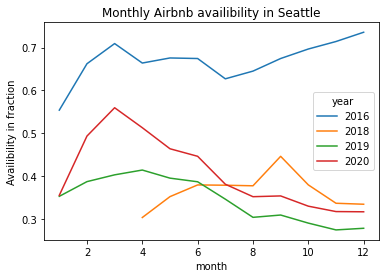

In [101]:
seattle_total.groupby(["month","year"]).t.mean().unstack().plot(kind='line',title = "Monthly Airbnb availibility in Seattle");
plt.ylabel("Availibility in fraction");

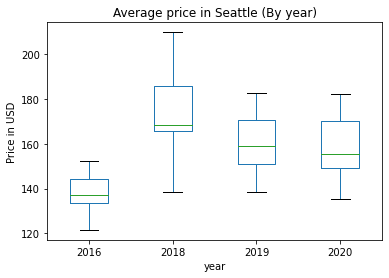

In [121]:
ax = seattle_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Average price in Seattle (By year)");
plt.ylabel("Price in USD");
ax.set_xlabel("year");
plt.savefig('seattle_price_year.png')


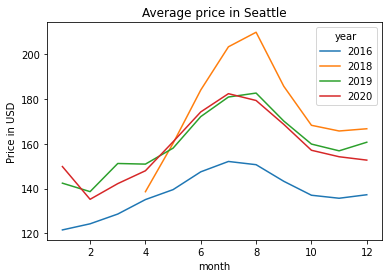

In [100]:
(seattle_total.groupby(["month","year"]).price.mean().unstack()).plot(kind='line',title = "Average price in Seattle");
plt.ylabel("Price in USD");

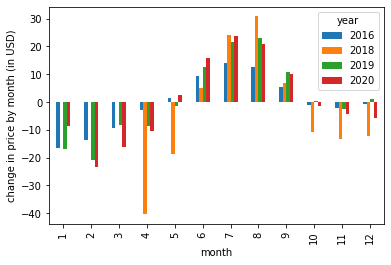

In [113]:
(seattle_total.groupby(["month","year"]).price.mean().unstack() - seattle_total.groupby(["year"]).price.mean()).plot(kind='bar');
plt.ylabel("change in price by month (in USD)");

Text(0, 0.5, 'Price change in USD')

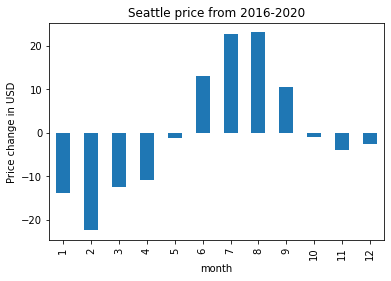

In [149]:
(seattle_total.groupby(["month"]).price.mean() - seattle_total.price.mean()).plot(kind='bar', title = "Seattle price from 2016-2020")
plt.ylabel("Price change in USD")

Text(0, 0.5, 'change in availibility by month (in USD)')

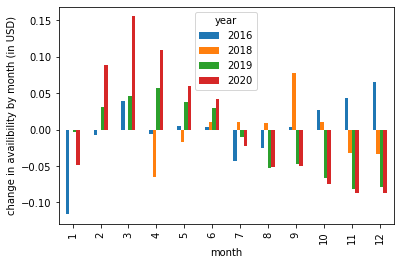

In [114]:
(seattle_total.groupby(["month","year"]).t.mean().unstack() - seattle_total.groupby(["year"]).t.mean()).plot(kind='bar');
plt.ylabel("change in availibility by month (in USD)")

In [110]:
seattle_total.groupby(["year"]).t.mean() # availibility by year

year
2016    0.670194
2018    0.369070
2019    0.357252
2020    0.404503
Name: t, dtype: float64

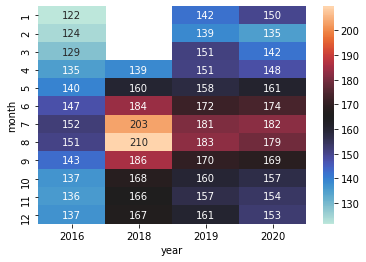

In [25]:
sns.heatmap(seattle_total.groupby(["month","year"]).price.mean().unstack(),fmt = '.0f',annot = True,cmap='icefire');

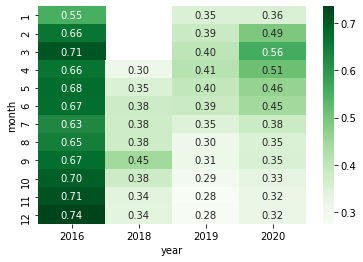

In [78]:
sns.heatmap(seattle_total.groupby(["month","year"]).t.mean().unstack(),fmt = '.02f',annot = True,cmap='Greens');

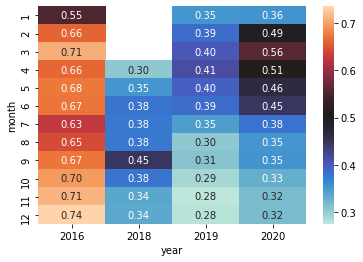

In [28]:
sns.heatmap(seattle_total.groupby(["month","year"]).t.mean().unstack(),fmt = '.02f',annot = True,cmap='icefire');

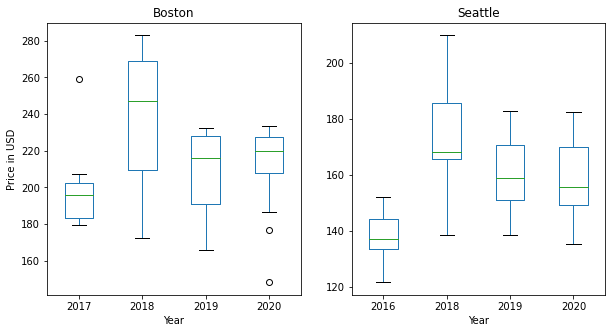

In [133]:

figure, axes = plt.subplots(1, 2,figsize=(10,5))
seattle_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Seattle", ax = axes[1]);
boston_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Boston",ax = axes[0]);
axes[0].set_ylabel("Price in USD")
axes[0].set_xlabel("Year")
axes[1].set_xlabel("Year")
plt.savefig('avg_price.png')

In [76]:
seattle_total.groupby(["year"]).price.mean()

year
2016    137.951375
2018    178.924106
2019    159.397455
2020    158.401441
Name: price, dtype: float64

In [77]:
boston_total.groupby(["year"]).price.mean()

year
2017    195.516520
2018    245.643596
2019    205.925102
2020    208.232248
Name: price, dtype: float64

So, from the above graph we can see that Seattle is cheaper to visit. For the past two years the average price of seattle is **159 dollars** whereas, the average price of Boston is **206 dollars**

Although in terms of availibility, 

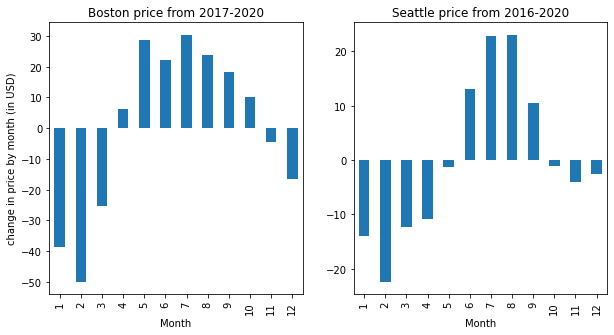

In [151]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))

(boston_total.groupby(["month"]).price.mean() - boston_total.price.mean()).plot(kind='bar', title = "Boston price from 2017-2020",ax = axes[0])
(seattle_total.groupby(["month"]).price.mean() - seattle_total.price.mean()).plot(kind='bar', title = "Seattle price from 2016-2020",ax = axes[1])
axes[0].set_ylabel("change in price by month (in USD)");
axes[0].set_xlabel("Month");
axes[1].set_xlabel("Month");
plt.savefig('price_change.png')

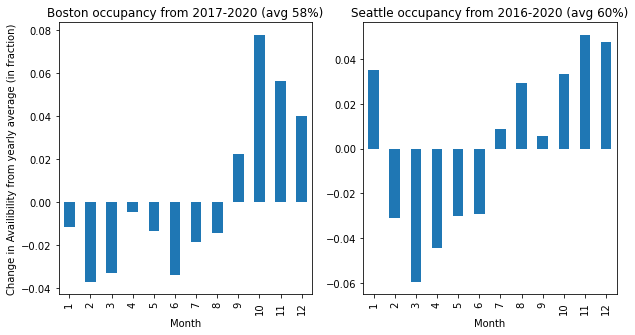

In [159]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))

(boston_total.groupby(["month"]).f.mean() - boston_total.f.mean()).plot(kind='bar',title = "Boston occupancy from 2017-2020 (avg 58%)",ax = axes[0]);


(seattle_total.groupby(["month"]).f.mean() - seattle_total.f.mean()).plot(kind='bar',title = "Seattle occupancy from 2016-2020 (avg 60%)",ax = axes[1]);
axes[0].set_ylabel("Change in Availibility from yearly average (in fraction)");
axes[0].set_xlabel("Month");
axes[1].set_xlabel("Month");
plt.savefig('accupancy.png')

## Average occupancy

In [162]:
# Average yearly occupancy of Boston (in percentage)

boston_total.groupby(["year"]).f.mean() * 100

year
2017    50.920629
2018    58.750468
2019    62.719612
2020    52.666338
Name: f, dtype: float64

In [163]:
# Average yearly occupancy of Seattle (in percentage)

seattle_total.groupby(["year"]).f.mean() * 100

year
2016    32.980647
2018    63.092975
2019    64.274842
2020    59.549681
Name: f, dtype: float64